In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# SMOTE
from imblearn.over_sampling import SMOTE


In [ ]:
# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/PCOS_Research/PCOS_data.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Drop irrelevant columns
df.drop(['Sl. No', 'Patient File No.', 'Unnamed: 44'], axis=1, inplace=True, errors='ignore')


Mounted at /content/drive


In [ ]:
# Fill categorical missing values with mode
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0], inplace=True)

# Fill numerical missing values with mean
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mean(), inplace=True)

# Convert object columns to numeric (if needed)
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

# Fill any new NaNs from conversion
df.fillna(df.mean(), inplace=True)


/tmp/ipython-input-3-1595753826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0], inplace=True)
/tmp/ipython-input-3-1595753826.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
# Target variable
y = df['PCOS (Y/N)']

# Drop target and non-numeric features
X = df.drop(['PCOS (Y/N)', 'Blood Group'], axis=1)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Check class balance after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_smote).value_counts())


Class distribution after SMOTE:
 PCOS (Y/N)
0    364
1    364
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)


# **Models on SMOTE Balanced DataSet**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔍 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


🔍 Logistic Regression
Accuracy: 0.9246575342465754
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        73
           1       0.89      0.97      0.93        73

    accuracy                           0.92       146
   macro avg       0.93      0.92      0.92       146
weighted avg       0.93      0.92      0.92       146

Confusion Matrix:
 [[64  9]
 [ 2 71]]


In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\n🔍 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



🔍 K-Nearest Neighbors
Accuracy: 0.9041095890410958
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        73
           1       0.86      0.97      0.91        73

    accuracy                           0.90       146
   macro avg       0.91      0.90      0.90       146
weighted avg       0.91      0.90      0.90       146

Confusion Matrix:
 [[61 12]
 [ 2 71]]


In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n🔍 Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



🔍 Support Vector Machine
Accuracy: 0.9383561643835616
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94        73
           1       0.93      0.95      0.94        73

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146

Confusion Matrix:
 [[68  5]
 [ 4 69]]


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🔍 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



🔍 Random Forest
Accuracy: 0.9452054794520548
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.95      0.95      0.95        73

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146

Confusion Matrix:
 [[69  4]
 [ 4 69]]


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n🔍 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))



🔍 Decision Tree
Accuracy: 0.8904109589041096
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        73
           1       0.93      0.85      0.89        73

    accuracy                           0.89       146
   macro avg       0.89      0.89      0.89       146
weighted avg       0.89      0.89      0.89       146

Confusion Matrix:
 [[68  5]
 [11 62]]


# **SelectKBest from DataSet**

20 Features


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest to select top 20 features
kbest_selector = SelectKBest(score_func=f_classif, k=20)
X_kbest20 = kbest_selector.fit_transform(X_smote, y_smote)

# Get feature names
selected_kbest_mask = kbest_selector.get_support()
selected_kbest_features = X.columns[selected_kbest_mask]
print("🎯 Top 20 Features:\n", selected_kbest_features.tolist())


🎯 Top 20 Features:
 ['Age (yrs)', 'Weight (Kg)', 'BMI', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Hip(inch)', 'Waist(inch)', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_kbest20_scaled = scaler.fit_transform(X_kbest20)

from sklearn.model_selection import train_test_split

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(
    X_kbest20_scaled, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_20 = LogisticRegression(max_iter=1000, random_state=42)
lr_20.fit(X_train_20, y_train_20)
y_pred_lr_20 = lr_20.predict(X_test_20)

print("🔍 Logistic Regression (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_lr_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_lr_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_lr_20))


🔍 Logistic Regression (Top 20 Features)
Accuracy: 0.9452054794520548
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.93      0.96      0.95        73

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146

Confusion Matrix:
 [[68  5]
 [ 3 70]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_20 = KNeighborsClassifier(n_neighbors=5)
knn_20.fit(X_train_20, y_train_20)
y_pred_knn_20 = knn_20.predict(X_test_20)

print("\n🔍 KNN (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_knn_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_knn_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_knn_20))



🔍 KNN (Top 20 Features)
Accuracy: 0.9178082191780822
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91        73
           1       0.88      0.97      0.92        73

    accuracy                           0.92       146
   macro avg       0.92      0.92      0.92       146
weighted avg       0.92      0.92      0.92       146

Confusion Matrix:
 [[63 10]
 [ 2 71]]


In [ ]:
from sklearn.svm import SVC

svm_20 = SVC(kernel='rbf', random_state=42)
svm_20.fit(X_train_20, y_train_20)
y_pred_svm_20 = svm_20.predict(X_test_20)

print("\n🔍 SVM (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_svm_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_svm_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_svm_20))



🔍 SVM (Top 20 Features)
Accuracy: 0.9315068493150684
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        73
           1       0.92      0.95      0.93        73

    accuracy                           0.93       146
   macro avg       0.93      0.93      0.93       146
weighted avg       0.93      0.93      0.93       146

Confusion Matrix:
 [[67  6]
 [ 4 69]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_20 = RandomForestClassifier(random_state=42)
rf_20.fit(X_train_20, y_train_20)
y_pred_rf_20 = rf_20.predict(X_test_20)

print("\n🔍 Random Forest (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_rf_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_rf_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_rf_20))



🔍 Random Forest (Top 20 Features)
Accuracy: 0.952054794520548
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1       0.96      0.95      0.95        73

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146

Confusion Matrix:
 [[70  3]
 [ 4 69]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_20 = DecisionTreeClassifier(random_state=42)
dt_20.fit(X_train_20, y_train_20)
y_pred_dt_20 = dt_20.predict(X_test_20)

print("\n🔍 Decision Tree (Top 20 Features)")
print("Accuracy:", accuracy_score(y_test_20, y_pred_dt_20))
print("Classification Report:\n", classification_report(y_test_20, y_pred_dt_20))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_dt_20))



🔍 Decision Tree (Top 20 Features)
Accuracy: 0.910958904109589
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        73
           1       0.89      0.93      0.91        73

    accuracy                           0.91       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.91      0.91      0.91       146

Confusion Matrix:
 [[65  8]
 [ 5 68]]


# **RFE to Select Top 15 Features from Top 20**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Base model for RFE
rf_base = RandomForestClassifier(random_state=42)

# Apply RFE to select top 15 features
rfe_selector_15 = RFE(estimator=rf_base, n_features_to_select=15)
X_rfe15 = rfe_selector_15.fit_transform(X_kbest20, y_smote)

# Get selected feature names from the original top 20
rfe15_mask = rfe_selector_15.get_support()
selected_features_15 = selected_kbest_features[rfe15_mask]  # same index from earlier
print("📌 Top 15 Features (from Top 20):\n", selected_features_15.tolist())


📌 Top 15 Features (from Top 20):
 ['Age (yrs)', 'Weight (Kg)', 'BMI', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Hip(inch)', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)']


In [ ]:
# Standardize the top 15 features
X_rfe15_scaled = scaler.fit_transform(X_rfe15)


In [ ]:
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(
    X_rfe15_scaled, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_15 = LogisticRegression(max_iter=1000, random_state=42)
lr_15.fit(X_train_15, y_train_15)
y_pred_lr_15 = lr_15.predict(X_test_15)

print("🔍 Logistic Regression (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_lr_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_lr_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_lr_15))


🔍 Logistic Regression (Top 15 Features)
Accuracy: 0.9041095890410958
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        73
           1       0.90      0.90      0.90        73

    accuracy                           0.90       146
   macro avg       0.90      0.90      0.90       146
weighted avg       0.90      0.90      0.90       146

Confusion Matrix:
 [[66  7]
 [ 7 66]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_15 = KNeighborsClassifier(n_neighbors=5)
knn_15.fit(X_train_15, y_train_15)
y_pred_knn_15 = knn_15.predict(X_test_15)

print("\n🔍 KNN (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_knn_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_knn_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_knn_15))



🔍 KNN (Top 15 Features)
Accuracy: 0.9041095890410958
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        73
           1       0.90      0.90      0.90        73

    accuracy                           0.90       146
   macro avg       0.90      0.90      0.90       146
weighted avg       0.90      0.90      0.90       146

Confusion Matrix:
 [[66  7]
 [ 7 66]]


In [ ]:
from sklearn.svm import SVC

svm_15 = SVC(kernel='rbf', random_state=42)
svm_15.fit(X_train_15, y_train_15)
y_pred_svm_15 = svm_15.predict(X_test_15)

print("\n🔍 SVM (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_svm_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_svm_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_svm_15))



🔍 SVM (Top 15 Features)
Accuracy: 0.9315068493150684
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.93      0.93      0.93        73

    accuracy                           0.93       146
   macro avg       0.93      0.93      0.93       146
weighted avg       0.93      0.93      0.93       146

Confusion Matrix:
 [[68  5]
 [ 5 68]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_15 = RandomForestClassifier(random_state=42)
rf_15.fit(X_train_15, y_train_15)
y_pred_rf_15 = rf_15.predict(X_test_15)

print("\n🔍 Random Forest (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_rf_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_rf_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_rf_15))



🔍 Random Forest (Top 15 Features)
Accuracy: 0.952054794520548
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1       0.96      0.95      0.95        73

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146

Confusion Matrix:
 [[70  3]
 [ 4 69]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_15 = DecisionTreeClassifier(random_state=42)
dt_15.fit(X_train_15, y_train_15)
y_pred_dt_15 = dt_15.predict(X_test_15)

print("\n🔍 Decision Tree (Top 15 Features)")
print("Accuracy:", accuracy_score(y_test_15, y_pred_dt_15))
print("Classification Report:\n", classification_report(y_test_15, y_pred_dt_15))
print("Confusion Matrix:\n", confusion_matrix(y_test_15, y_pred_dt_15))



🔍 Decision Tree (Top 15 Features)
Accuracy: 0.8904109589041096
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        73
           1       0.89      0.89      0.89        73

    accuracy                           0.89       146
   macro avg       0.89      0.89      0.89       146
weighted avg       0.89      0.89      0.89       146

Confusion Matrix:
 [[65  8]
 [ 8 65]]


# **Apply RFE to get top 10 features (Random Forest) on 15 features**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use the same 15-feature input
# X_rfe15 is the array of shape (728, 15)
# selected_features_15 are the feature names (Index object)

# Base model
rf_base2 = RandomForestClassifier(random_state=42)

# Apply RFE to reduce from 15 to 10
rfe_selector_10 = RFE(estimator=rf_base2, n_features_to_select=10)
X_rfe10 = rfe_selector_10.fit_transform(X_rfe15, y_smote)

# Get selected feature names
rfe10_mask = rfe_selector_10.get_support()
selected_features_10 = selected_features_15[rfe10_mask]

print("📌 Top 10 Features (from Top 15):\n", selected_features_10.tolist())


📌 Top 10 Features (from Top 15):
 ['Age (yrs)', 'BMI', 'Cycle length(days)', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)']


In [ ]:
X_rfe10_scaled = scaler.fit_transform(X_rfe10)


In [ ]:
from sklearn.model_selection import train_test_split

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(
    X_rfe10_scaled, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_10 = LogisticRegression(max_iter=1000, random_state=42)
lr_10.fit(X_train_10, y_train_10)
y_pred_lr_10 = lr_10.predict(X_test_10)

print("🔍 Logistic Regression (Top 10 Features)")
print("Accuracy:", accuracy_score(y_test_10, y_pred_lr_10))
print("Classification Report:\n", classification_report(y_test_10, y_pred_lr_10))
print("Confusion Matrix:\n", confusion_matrix(y_test_10, y_pred_lr_10))


🔍 Logistic Regression (Top 10 Features)
Accuracy: 0.9041095890410958
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        73
           1       0.90      0.90      0.90        73

    accuracy                           0.90       146
   macro avg       0.90      0.90      0.90       146
weighted avg       0.90      0.90      0.90       146

Confusion Matrix:
 [[66  7]
 [ 7 66]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_10 = KNeighborsClassifier(n_neighbors=5)
knn_10.fit(X_train_10, y_train_10)
y_pred_knn_10 = knn_10.predict(X_test_10)

print("\n🔍 KNN (Top 10 Features)")
print("Accuracy:", accuracy_score(y_test_10, y_pred_knn_10))
print("Classification Report:\n", classification_report(y_test_10, y_pred_knn_10))
print("Confusion Matrix:\n", confusion_matrix(y_test_10, y_pred_knn_10))



🔍 KNN (Top 10 Features)
Accuracy: 0.910958904109589
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        73
           1       0.92      0.90      0.91        73

    accuracy                           0.91       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.91      0.91      0.91       146

Confusion Matrix:
 [[67  6]
 [ 7 66]]


In [ ]:
from sklearn.svm import SVC

svm_10 = SVC(kernel='rbf', random_state=42)
svm_10.fit(X_train_10, y_train_10)
y_pred_svm_10 = svm_10.predict(X_test_10)

print("\n🔍 SVM (Top 10 Features)")
print("Accuracy:", accuracy_score(y_test_10, y_pred_svm_10))
print("Classification Report:\n", classification_report(y_test_10, y_pred_svm_10))
print("Confusion Matrix:\n", confusion_matrix(y_test_10, y_pred_svm_10))



🔍 SVM (Top 10 Features)
Accuracy: 0.9246575342465754
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92        73
           1       0.92      0.93      0.93        73

    accuracy                           0.92       146
   macro avg       0.92      0.92      0.92       146
weighted avg       0.92      0.92      0.92       146

Confusion Matrix:
 [[67  6]
 [ 5 68]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_10 = RandomForestClassifier(random_state=42)
rf_10.fit(X_train_10, y_train_10)
y_pred_rf_10 = rf_10.predict(X_test_10)

print("\n🔍 Random Forest (Top 10 Features)")
print("Accuracy:", accuracy_score(y_test_10, y_pred_rf_10))
print("Classification Report:\n", classification_report(y_test_10, y_pred_rf_10))
print("Confusion Matrix:\n", confusion_matrix(y_test_10, y_pred_rf_10))



🔍 Random Forest (Top 10 Features)
Accuracy: 0.958904109589041
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.97      0.95      0.96        73

    accuracy                           0.96       146
   macro avg       0.96      0.96      0.96       146
weighted avg       0.96      0.96      0.96       146

Confusion Matrix:
 [[71  2]
 [ 4 69]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_10 = DecisionTreeClassifier(random_state=42)
dt_10.fit(X_train_10, y_train_10)
y_pred_dt_10 = dt_10.predict(X_test_10)

print("\n🔍 Decision Tree (Top 10 Features)")
print("Accuracy:", accuracy_score(y_test_10, y_pred_dt_10))
print("Classification Report:\n", classification_report(y_test_10, y_pred_dt_10))
print("Confusion Matrix:\n", confusion_matrix(y_test_10, y_pred_dt_10))



🔍 Decision Tree (Top 10 Features)
Accuracy: 0.8904109589041096
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        73
           1       0.90      0.88      0.89        73

    accuracy                           0.89       146
   macro avg       0.89      0.89      0.89       146
weighted avg       0.89      0.89      0.89       146

Confusion Matrix:
 [[66  7]
 [ 9 64]]


# **SHAP (SHapley Additive exPlanations) helps explain how each feature contributes to a model’s prediction**

In [ ]:
!pip install shap

import shap
import matplotlib.pyplot as plt

# Initialize JavaScript visualizations
shap.initjs()

# Convert scaled X_rfe10 (numpy array) to DataFrame for SHAP
X_rfe10_df = pd.DataFrame(X_rfe10_scaled, columns=selected_features_10)


**1. Logistic Regression**

  0%|          | 0/728 [00:00<?, ?it/s]

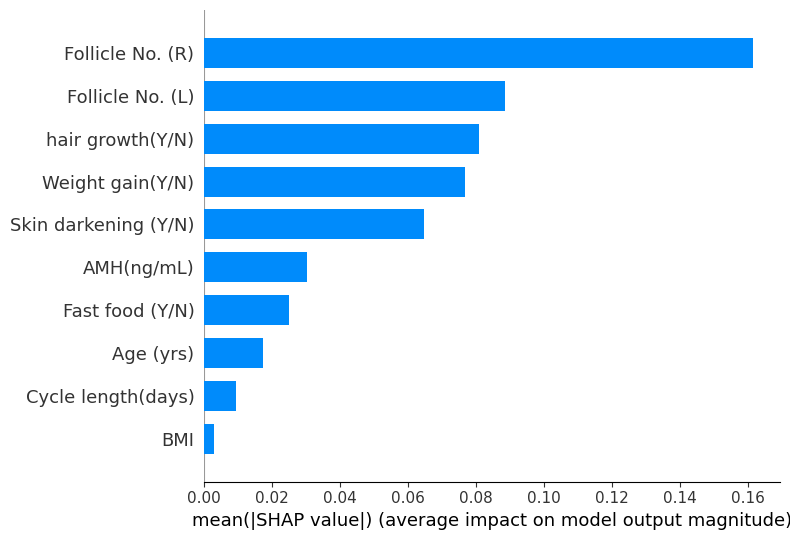

In [ ]:
# SHAP for Logistic Regression

# Use KernelExplainer for linear models
explainer_lr = shap.KernelExplainer(lr_10.predict_proba, X_rfe10_df)
shap_values_lr = explainer_lr.shap_values(X_rfe10_df)

shap_values_class1 = shap_values_lr[:, :, 1]

# Plot summary
shap.summary_plot(shap_values_class1, X_rfe10_df, plot_type='bar')


**2. KNN**

  0%|          | 0/728 [00:00<?, ?it/s]

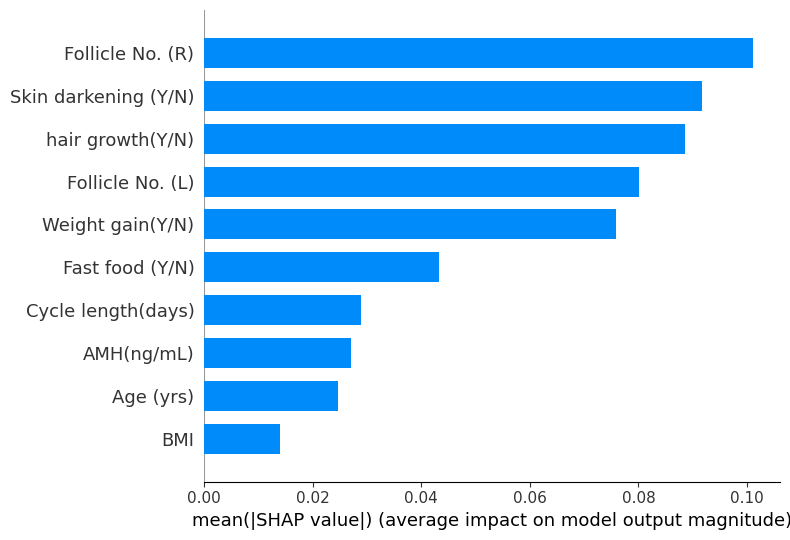

In [ ]:
# SHAP for KNN

# ⚡️ Sample fewer background data points for speed
background_knn = shap.sample(X_rfe10_df, 100, random_state=42)

# 🧠 Use predict_proba for class probabilities
explainer_knn = shap.KernelExplainer(knn_10.predict_proba, background_knn)

# ⚠️ This may take a few minutes
shap_values_knn = explainer_knn.shap_values(X_rfe10_df)

# Extract SHAP values for class 1 (PCOS = 1)
shap_values_knn_class1 = shap_values_knn[:, :, 1]

# 📊 Plot SHAP summary
shap.summary_plot(shap_values_knn_class1, X_rfe10_df, plot_type='bar')


📌 Analogy:
Imagine you're trying to understand how a student's score compares to a reference group:

Background group = a sample of 100 students across schools

Target students = all 728 students in your current class whose performance you want to explain

You use the background group to judge how much each feature (e.g., study hours, attendance) contributes to each student's score.

**3. SVM**

In [ ]:
from sklearn.svm import SVC

# 🔁 Retrain SVM with probability=True
svm_10_prob = SVC(kernel='rbf', probability=True, random_state=42)
svm_10_prob.fit(X_train_10, y_train_10)


SVC(probability=True, random_state=42)

  0%|          | 0/728 [00:00<?, ?it/s]

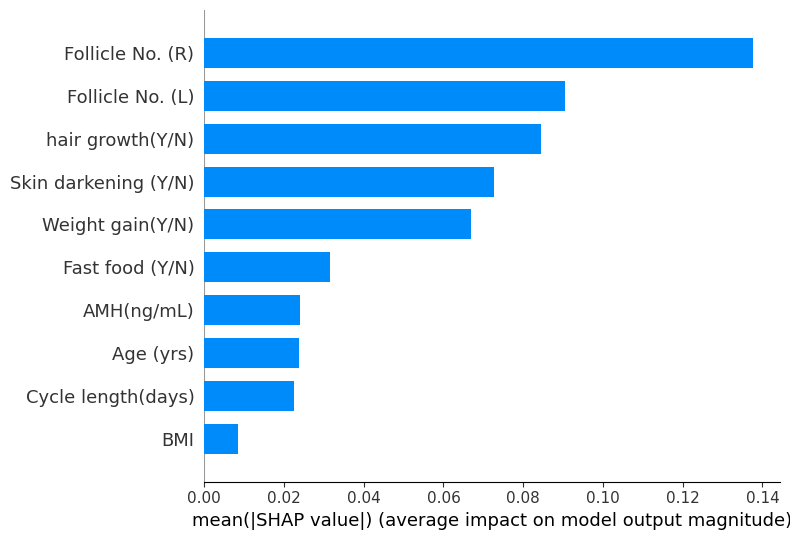

In [ ]:
# Sample background to speed up SHAP
background_svm = shap.sample(X_rfe10_df, 100, random_state=42)

# Initialize SHAP explainer
explainer_svm = shap.KernelExplainer(svm_10_prob.predict_proba, background_svm)

# Compute SHAP values (may take a few mins)
shap_values_svm = explainer_svm.shap_values(X_rfe10_df)

# Extract SHAP values for class 1 (PCOS)
shap_values_svm_class1 = shap_values_svm[:, :, 1]

# Plot summary
shap.summary_plot(shap_values_svm_class1, X_rfe10_df, plot_type='bar')


**4. Random Forest**

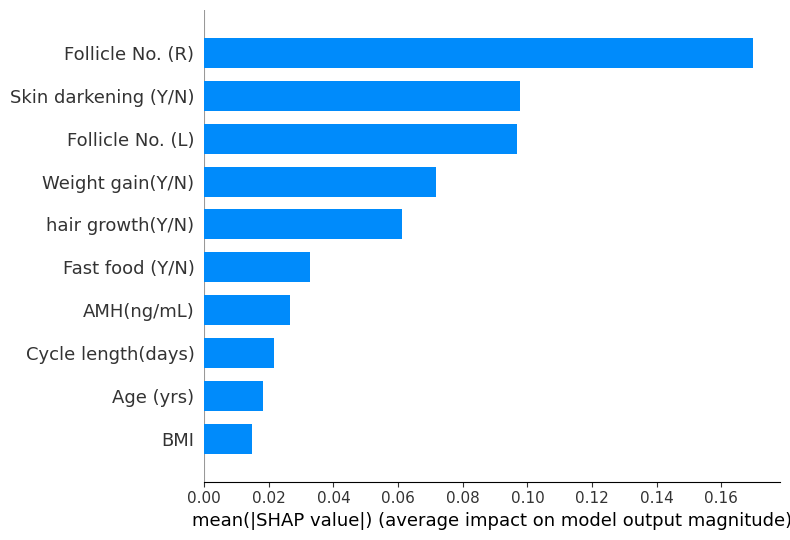

In [ ]:
# Initialize TreeExplainer for Random Forest
explainer_rf = shap.TreeExplainer(rf_10)

# Compute SHAP values (fast for tree-based models)
shap_values_rf = explainer_rf.shap_values(X_rfe10_df)

# Extract class 1 (PCOS = 1) SHAP values from 3D array
shap_values_rf_class1 = shap_values_rf[:, :, 1]  # shape: (728, 10)

# Plot summary (bar chart)
shap.summary_plot(shap_values_rf_class1, X_rfe10_df, plot_type='bar')


**5. Decision Tree**

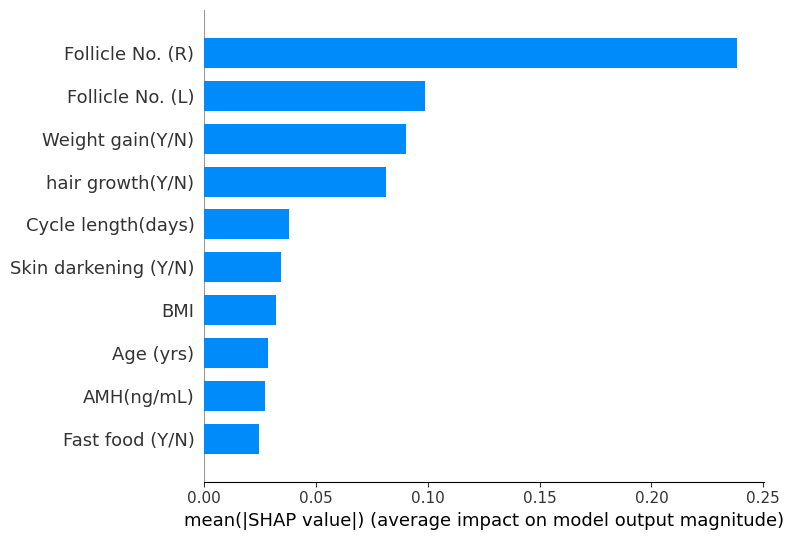

In [ ]:
# Initialize SHAP TreeExplainer for Decision Tree
explainer_dt = shap.TreeExplainer(dt_10)

# Compute SHAP values
shap_values_dt = explainer_dt.shap_values(X_rfe10_df)

# Extract SHAP values for class 1 (PCOS = 1)
shap_values_dt_class1 = shap_values_dt[:, :, 1]

# Plot bar summary
shap.summary_plot(shap_values_dt_class1, X_rfe10_df, plot_type='bar')
